<a href="https://colab.research.google.com/github/kurtofaruk/quizzes/blob/main/Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [136]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [138]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in df.columns:

    df[i] = le.fit_transform(df[i])

print("Label Encoded Data: ")

df.head()

Label Encoded Data: 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [140]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


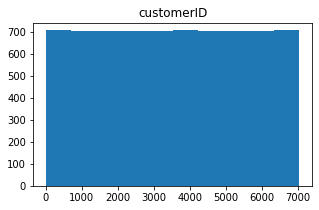

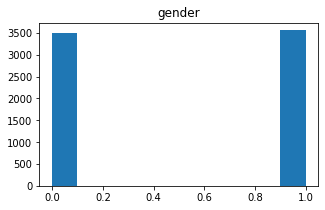

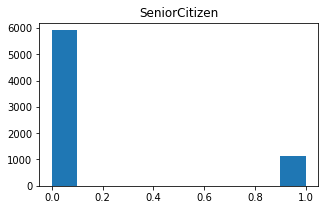

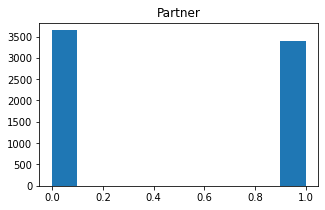

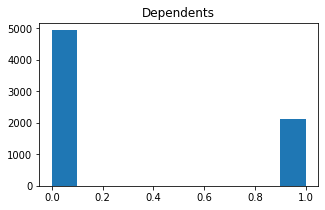

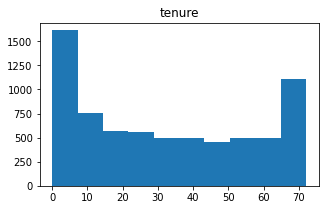

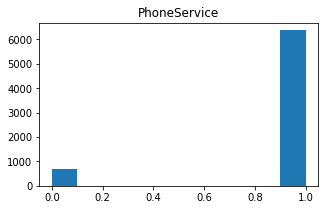

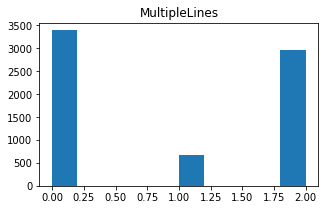

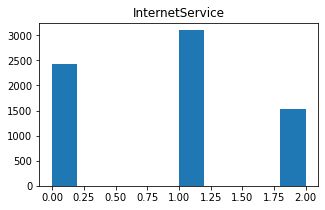

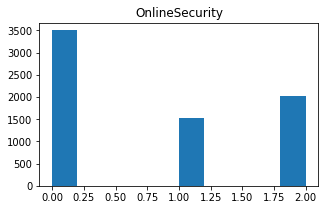

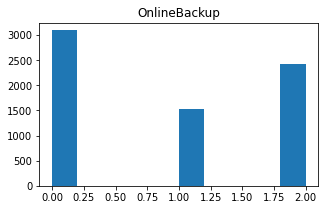

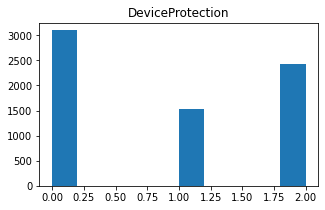

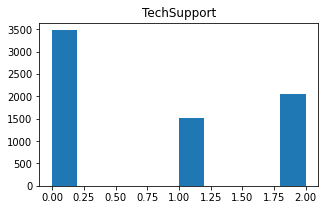

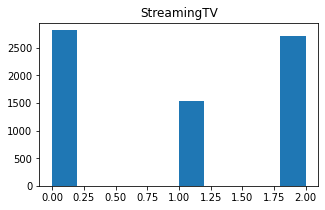

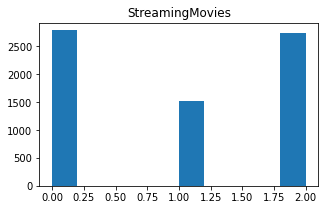

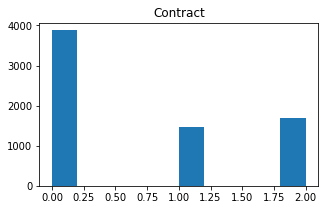

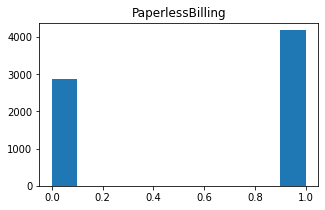

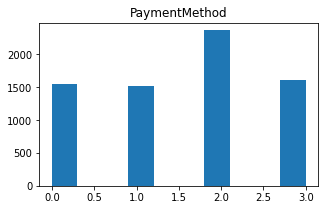

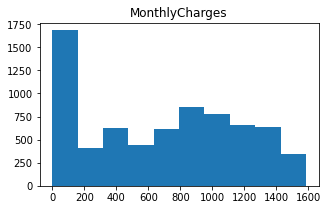

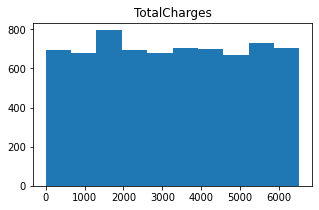

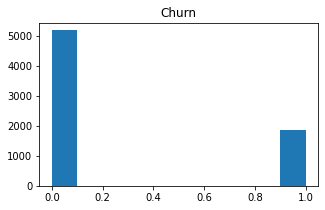

In [141]:
for i in df.columns:
  plt.figure(figsize=(5,3))
  plt.hist(df[i]);
  plt.title(i)

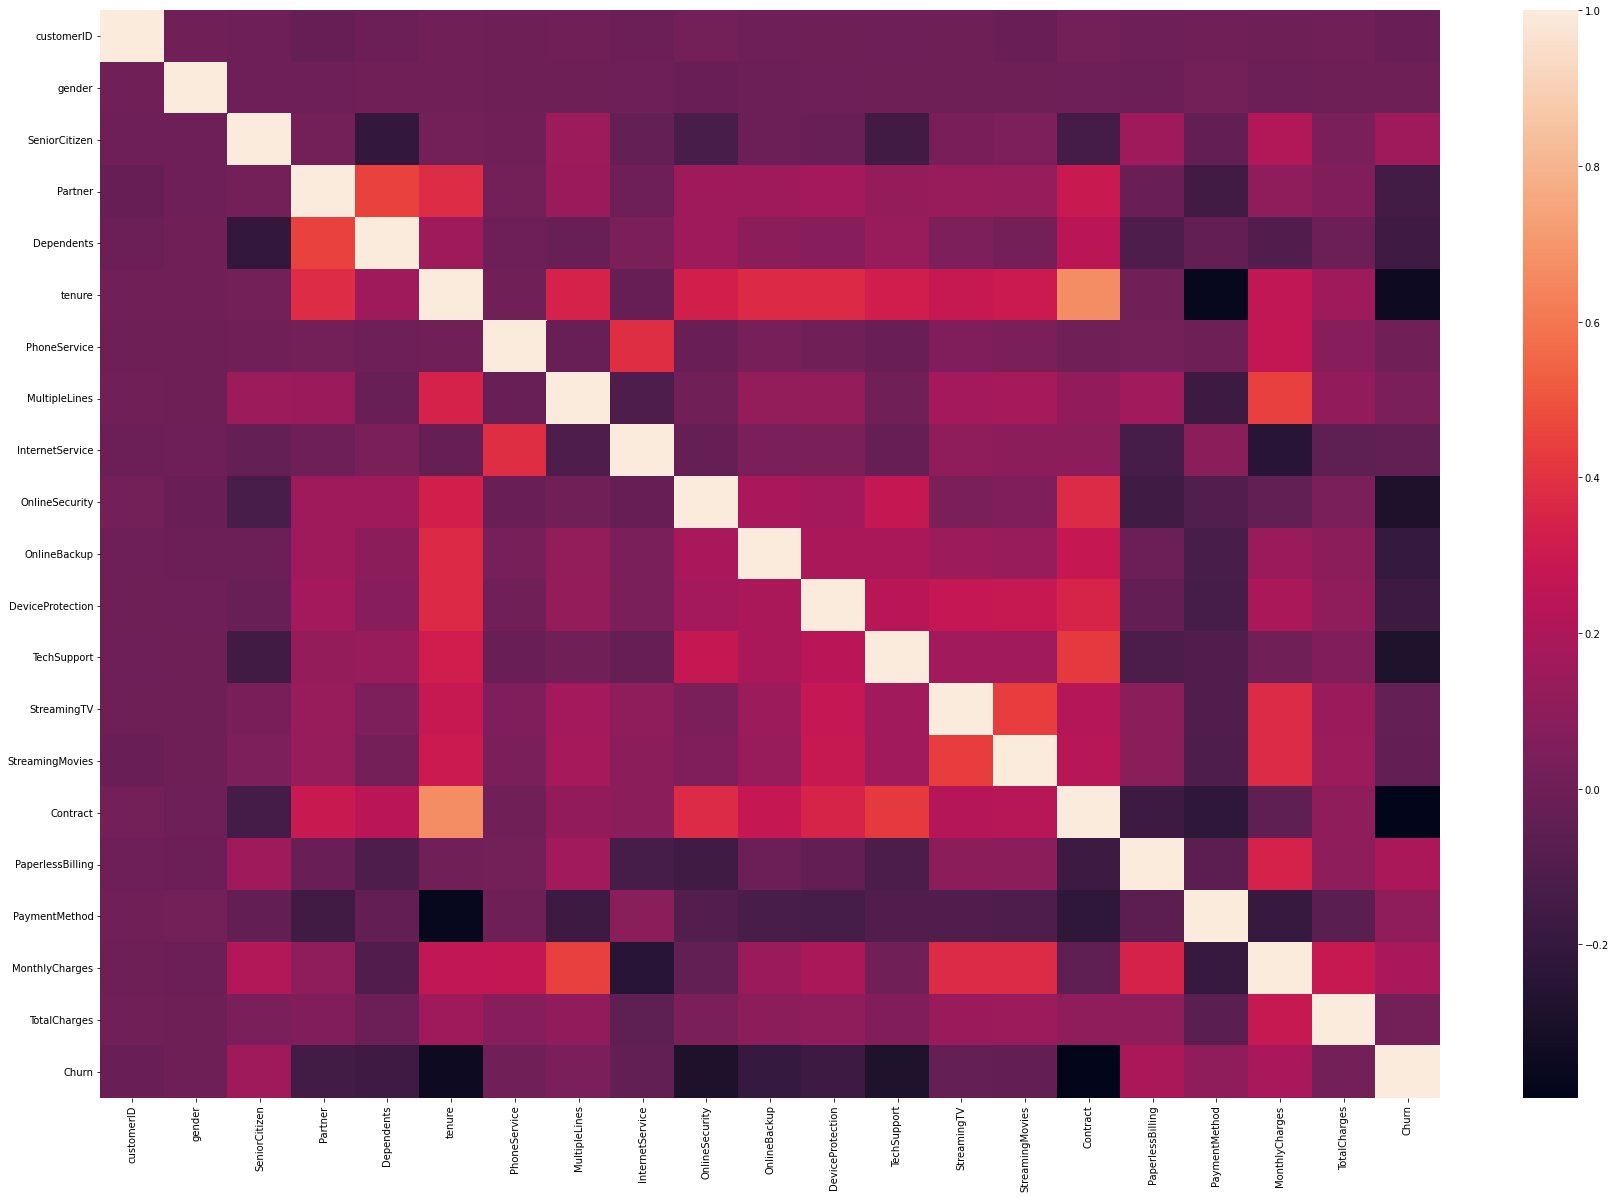

In [160]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


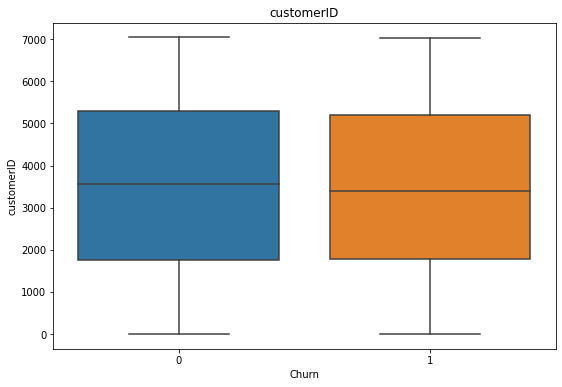

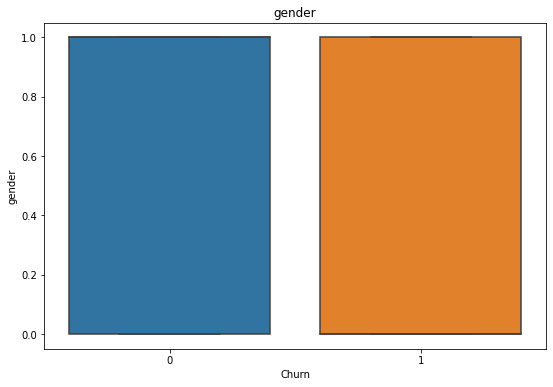

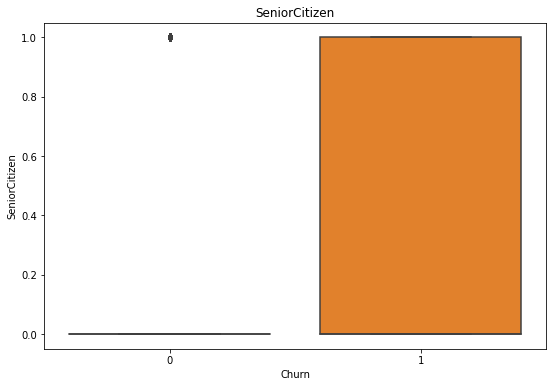

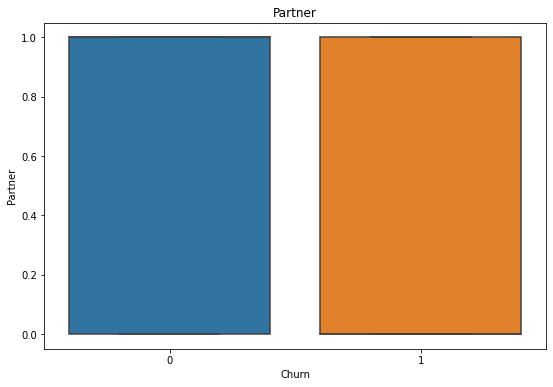

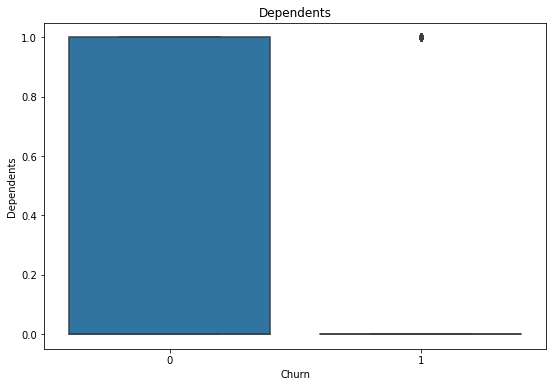

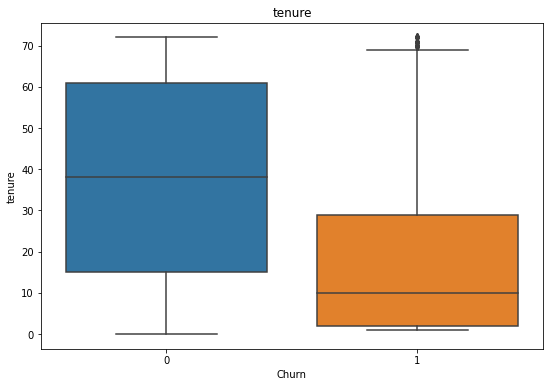

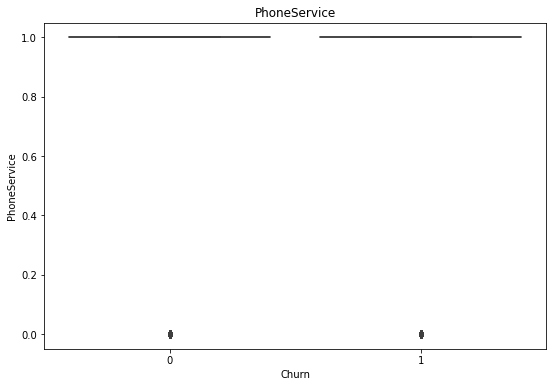

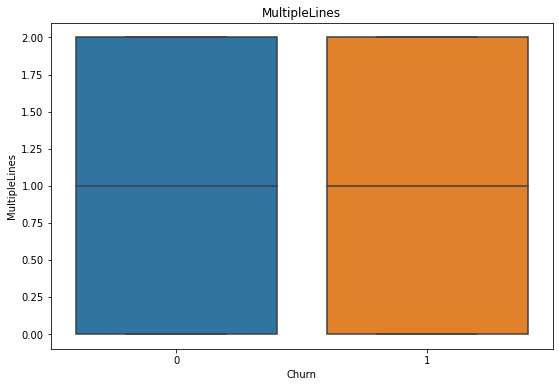

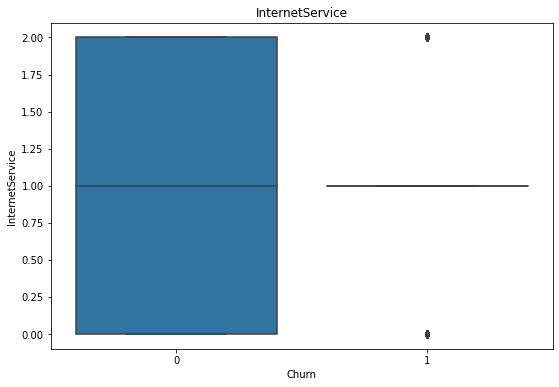

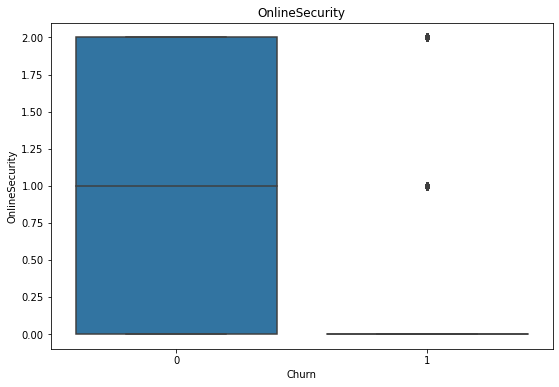

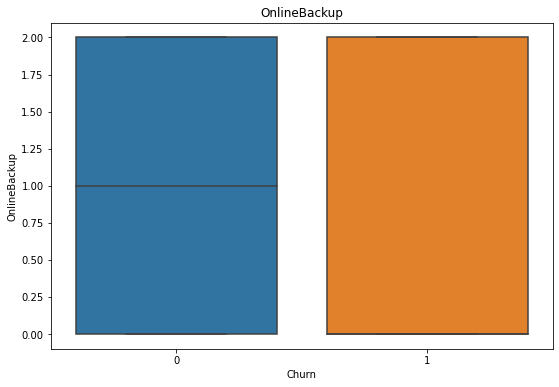

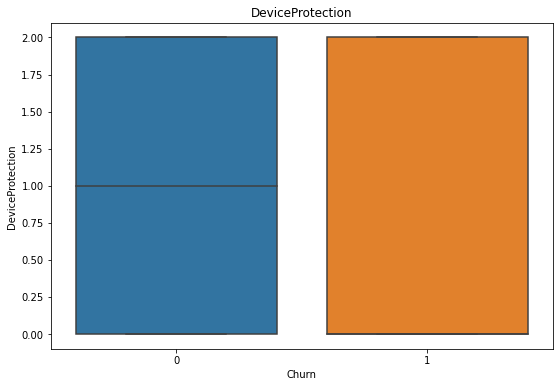

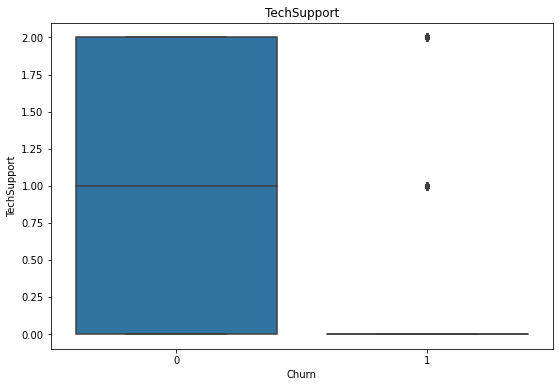

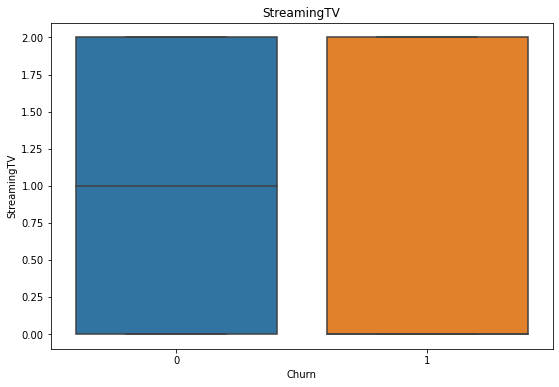

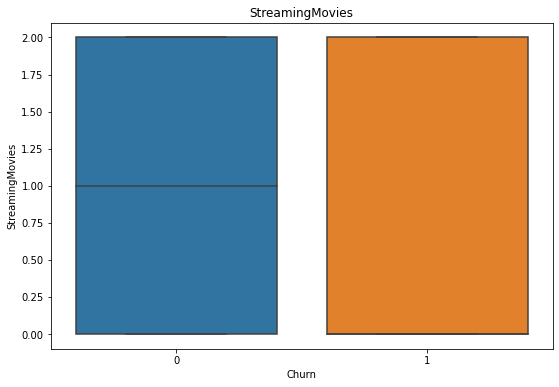

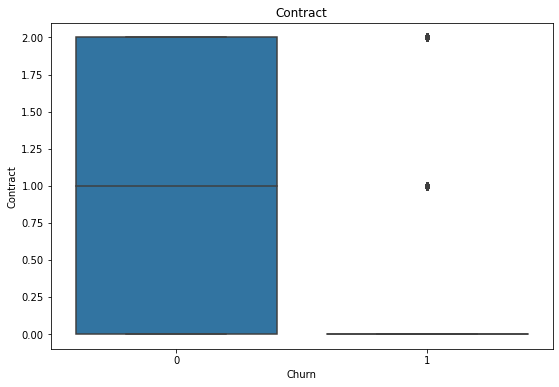

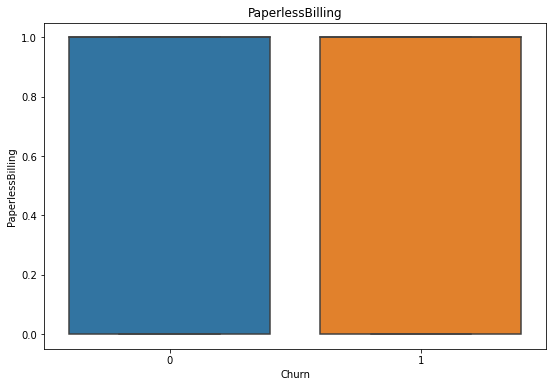

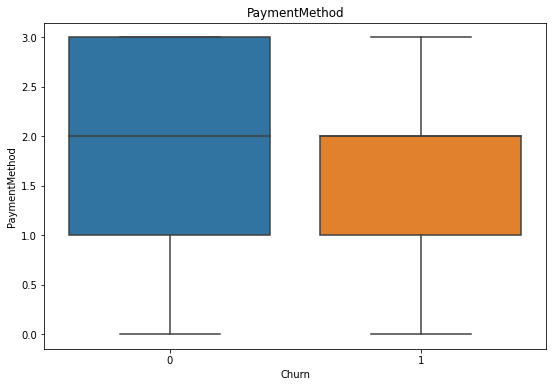

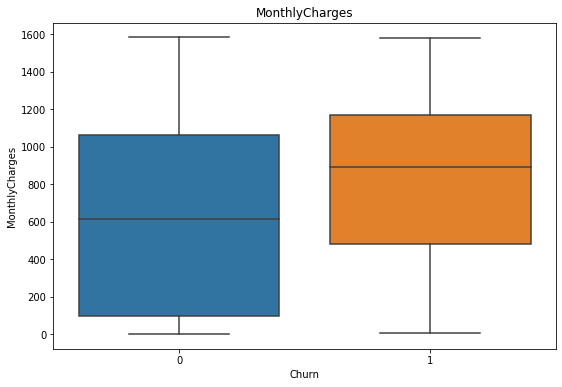

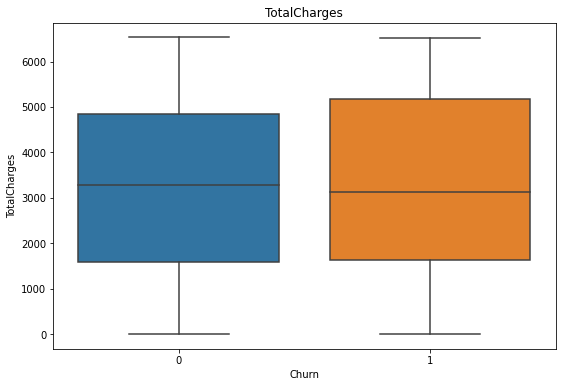

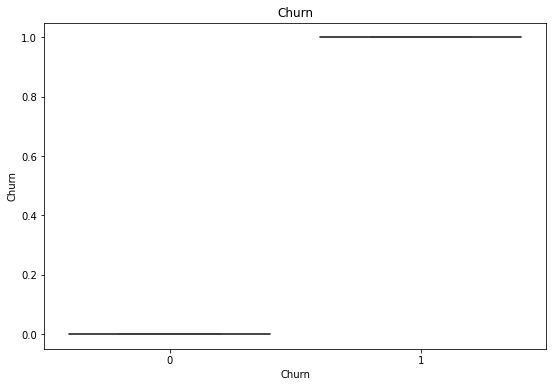

In [143]:
for i in df.columns:
  plt.figure(figsize=(9,6))
  sns.boxplot(data=df, x='Churn', y=df[i])
  plt.title(i);

In [144]:
df[df['Churn']==0].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.00000,5174.0
mean,3542.319869,0.507344,0.128721,0.528218,0.344801,37.569965,0.901044,0.918825,0.893893,0.939505,1.009857,0.998647,0.943371,1.004832,1.012949,0.889254,0.535562,1.505605,630.747971,3241.35949,0.0
std,2040.513952,0.499994,0.334923,0.499251,0.475349,24.113777,0.298632,0.945847,0.800728,0.850520,0.852612,0.852668,0.850786,0.852655,0.852571,0.857478,0.498782,1.118647,490.874920,1873.65472,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
25%,1759.500000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,94.000000,1592.25000,0.0
50%,3572.500000,1.000000,0.000000,1.000000,0.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,616.500000,3278.50000,0.0
75%,5305.250000,1.000000,0.000000,1.000000,1.000000,61.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1061.000000,4842.25000,0.0
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.00000,0.0


In [145]:
df[df['Churn']==1].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,3461.979668,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,1.000535,0.814874,0.376137,0.620118,0.643660,0.392188,0.931514,0.935795,0.140182,0.749064,1.764580,829.628143,3303.290530,1.0
std,2012.495404,0.500128,0.435799,0.479524,0.379576,19.531123,0.287626,0.953692,0.521459,0.742044,0.891995,0.901663,0.755255,0.967135,0.967429,0.414714,0.433668,0.886617,408.452881,1929.492699,0.0
min,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,1.0
25%,1774.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,482.000000,1625.000000,1.0
50%,3388.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,893.000000,3131.000000,1.0
75%,5199.000000,1.000000,1.000000,1.000000,0.000000,29.000000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1172.000000,5167.000000,1.0
max,7039.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1581.000000,6528.000000,1.0


In [146]:
X = df.drop('Churn',axis=1).values
y = df['Churn'].values

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)      

In [148]:
"""
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

'\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\n'

In [149]:
#accuracy of logistic regression
cm = confusion_matrix(y_test,y_pred_logr)
print('Confusion Matrix of Logistic Regression:' , cm)
print('**********')
acc_logr = accuracy_score(y_test,y_pred_logr)
print('Accuracy of Logistic Regression :' ,acc_logr)
print('**********')
success = cross_val_score(estimator = logr, X=X_train, y=y_train, cv =10)
print(success)

Confusion Matrix of Logistic Regression: [[936 105]
 [187 181]]
**********
Accuracy of Logistic Regression : 0.7927608232789212
**********


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.81205674 0.82446809 0.80851064 0.79964539 0.79396092 0.80817052
 0.78330373 0.78507993 0.80284192 0.80639432]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [132]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=500)
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
print(y_pred_dtc)
cm=confusion_matrix(y_test,y_pred_dtc)
print('Confusion Matrix of Decision Tree :' , cm)

print('**********')
acc_dtc = accuracy_score(y_test,y_pred_dtc)
print('Accuracy of Decision Tree :' ,acc_dtc)
print('**********')
success = cross_val_score(estimator = dtc, X=X_train, y=y_train, cv =10)
print(success)

[0 1 0 ... 1 0 1]
Confusion Matrix of Decision Tree : [[839 202]
 [186 182]]
**********
Accuracy of Decision Tree : 0.7246273953158269
**********
[0.7535461  0.74822695 0.7464539  0.75531915 0.71580817 0.70692718
 0.71936057 0.73357016 0.75133215 0.71936057]


In [150]:
#Support vector machine algorithm(SVM)
cls = svm.SVC(kernel = 'rbf').fit(X_train,y_train)
y_pred_svm = cls.predict(X_test)
print(y_pred_svm)
cm=confusion_matrix(y_test,y_pred_svm)
print('Confusion Matrix of SVM :' , cm)

print('**********')
acc_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of SVM :' ,acc_svm)
print('**********')
success = cross_val_score(estimator = cls, X=X_train, y=y_train, cv =10)
print(success)

[0 0 0 ... 0 0 0]
Confusion Matrix of SVM : [[1041    0]
 [ 368    0]]
**********
Accuracy of SVM : 0.7388218594748048
**********
[0.73404255 0.73404255 0.73404255 0.7322695  0.73357016 0.73357016
 0.73357016 0.73357016 0.73357016 0.73357016]


In [151]:
#XGBoost Classifier
xgb = XGBClassifier()
params_xgb = {'n_estimators': [3,6,9,18,36,72,720], 'learning_rate': [0.2,0.5,0.8,1]}
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print(y_pred_xgb)
cm=confusion_matrix(y_test,y_pred_xgb)
print('Confusion Matrix of XGBoost :' , cm)

print('**********')
acc_xgb = accuracy_score(y_test,y_pred_xgb)
print('Accuracy of XGBoost :' ,acc_xgb)
print('**********')
success = cross_val_score(estimator = xgb, X=X_train, y=y_train, cv =8)
print(success)

[0 0 0 ... 0 0 1]
Confusion Matrix of XGBoost : [[940 101]
 [187 181]]
**********
Accuracy of XGBoost : 0.7955997161107168
**********
[0.80283688 0.81843972 0.80397727 0.81960227 0.80255682 0.77840909
 0.80965909 0.79829545]


In [133]:
#RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print(y_pred_rfc)
cm=confusion_matrix(y_test,y_pred_rfc)
print('Confusion Matrix of RFC :' , cm)

print('**********')
acc_rfc = accuracy_score(y_test,y_pred_rfc)
print('Accuracy of RFC :' ,acc_rfc)
print('**********')
success = cross_val_score(estimator = rfc, X=X_train, y=y_train, cv =10)
print(success)

[0 0 0 ... 0 0 1]
Confusion Matrix of RFC : [[929 112]
 [191 177]]
**********
Accuracy of RFC : 0.7849538679914834
**********
[0.80673759 0.82801418 0.79609929 0.80319149 0.78863233 0.79396092
 0.77264654 0.79218472 0.80106572 0.79751332]


In [134]:
#K-Nearest Neighbor(KNN) Classification

knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train,y_train)
y_pred_knc = knc.predict(X_test)
print(y_pred_knc)
cm=confusion_matrix(y_test,y_pred_knc)
print('Confusion Matrix of RFC :' , cm)

print('**********')

acc_knc = accuracy_score(y_test,y_pred_knc)
print('Accuracy of KNN :' ,acc_knc)

print('**********')

success = cross_val_score(estimator = knc, X=X_train, y=y_train, cv =10)
print(success)

[0 0 0 ... 1 0 1]
Confusion Matrix of RFC : [[969  72]
 [295  73]]
**********
Accuracy of KNN : 0.7395315826827538
**********
[0.73404255 0.7429078  0.74113475 0.74468085 0.71758437 0.74245115
 0.72646536 0.72646536 0.73712256 0.74067496]


In [152]:
print('Accuracy of Logistic Regression :' ,acc_logr)
print('Accuracy of Decision Tree :' ,acc_dtc)
print('Accuracy of SVM :' ,acc_svm)
print('Accuracy of XGBoost :' ,acc_xgb)
print('Accuracy of RFC :' ,acc_rfc)
print('Accuracy of KNN :' ,acc_knc)

Accuracy of Logistic Regression : 0.7927608232789212
Accuracy of Decision Tree : 0.7246273953158269
Accuracy of SVM : 0.7388218594748048
Accuracy of XGBoost : 0.7955997161107168
Accuracy of RFC : 0.7849538679914834
Accuracy of KNN : 0.7395315826827538
